In [24]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [7]:
complaints = pd.read_csv("data/complaints-2019-05-16_13_17.csv")
complaints = complaints.dropna(subset=["Consumer disputed?"])

In [8]:
complaints_narrative = complaints.loc[:, ["Complaint ID","Consumer complaint narrative", "Consumer disputed?"]]
print("There are {} complaints with narrative with label".format(len(complaints_narrative)))

There are 164076 complaints with narrative with label


### Revisit Vader whether there is difference between dispute group and not dispute group

In [10]:
dispute_complaints = complaints[complaints["Consumer disputed?"] == "Yes"]
not_dispute_complaints = complaints[complaints["Consumer disputed?"] == "No"]

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vader_score(narratives):
    analyser = SentimentIntensityAnalyzer()

    sentiment_score_list = []
    for narrative in narratives:
        score = analyser.polarity_scores(narrative)
        sentiment_score_list.append(score["compound"])
    
    return sentiment_score_list



In [12]:
scores_dispute = vader_score(dispute_complaints["Consumer complaint narrative"])
scores_not_dispute = vader_score(not_dispute_complaints["Consumer complaint narrative"])

Text(0.5, 1.0, 'Distribution of sentiment score in dispute_complaints and not dispute complaints')

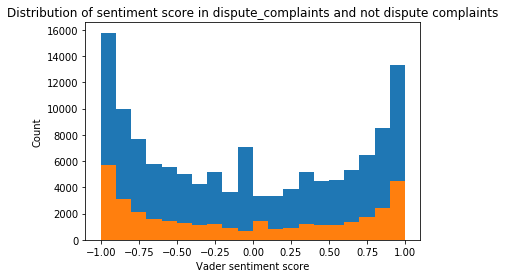

In [17]:

plt.hist(scores_not_dispute, bins = 20)
plt.hist(scores_dispute, bins = 20)
plt.xlabel("Vader sentiment score")
plt.ylabel("Count")
plt.title("Distribution of sentiment score in dispute_complaints and not dispute complaints")

In [28]:
def pre_process_narrative(complaints):
    narratives = complaints["Consumer complaint narrative"]
    cleaned_narratives = []
    
    for narrative in narratives:
        # Remove digits in the narrative. There are not useful for text classification
        narrative = re.sub(r"\d+", "", narrative)
        # Remove XXXX which is substitute by US govenment to protect privacy
        narrative = re.sub(r"XXXX", "", narrative)
        cleaned_narratives.append(narrative)
    
    print(complaints.shape)
    print(len(cleaned_narratives))
    
    complaints["cleaned_narrative"] = cleaned_narratives

pre_process_narrative(complaints)
        

(164076, 18)
164076


In [35]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

def LDA(text):
    vect = CountVectorizer(max_features=10000, ngram_range=(1,3), min_df=5, stop_words="english")
    #vect = CountVectorizer(ngram_range=(1,3), min_df=5, stop_words="english")
    X = vect.fit_transform(text)
    #X = vect.fit_transform(text_train)

    lda = LatentDirichletAllocation(n_topics=5, learning_method="batch",
                                    max_iter=25, random_state=0)
    # We build the model and transform the data in one step
    # Computing transform makes some time,
    document_topics = lda.fit_transform(X)

    print(lda.components_.shape)

    sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
    feature_names = np.array(vect.get_feature_names())
    
    print(feature_names[:100])
    return lda, vect

In [36]:

sub_complaints = complaints["cleaned_narrative"]

lda, vect = LDA(sub_complaints[:1000])

/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


(5, 2894)
['ability' 'able' 'able forward' 'able forward credit' 'able make'
 'able pay' 'able provide' 'able verify' 'able verify identity'
 'absolutely' 'abusive' 'accept' 'acceptable' 'acceptance' 'accepted'
 'accepting' 'access' 'access account' 'accessed' 'accident' 'accordance'
 'according' 'account' 'account account' 'account balance' 'account bank'
 'account called' 'account closed' 'account company' 'account credit'
 'account credit report' 'account current' 'account date' 'account day'
 'account days' 'account did' 'account does' 'account immediately'
 'account information' 'account like' 'account listed' 'account month'
 'account number' 'account open' 'account opened' 'account paid'
 'account pay' 'account payments' 'account received' 'account removed'
 'account reported' 'account said' 'account sent' 'account status'
 'account time' 'account told' 'account transferred' 'account went'
 'account xx' 'account xx xx' 'account years' 'accounting' 'accounts'
 'accounts good' 'ac